# Linear regression

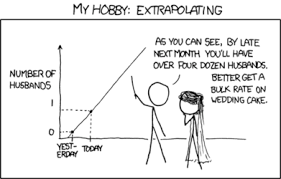


In [134]:
%%capture
!pip install statsmodels
!pip install sklearn

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Table of Contents

## Simple linear regression

Simple linear regression an statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

In [228]:
# From the example in the previous class
beta_1 =  0.08#0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

In [229]:
data

,grade,hours
0,38.490551,330.846893
1,61.537695,596.760558
2,76.406603,730.522945
3,77.129123,828.405466
4,39.417634,464.012506
...,...,...
95,39.334271,317.577231
96,59.331354,526.776246
97,50.942592,646.549711
98,66.891783,669.105032


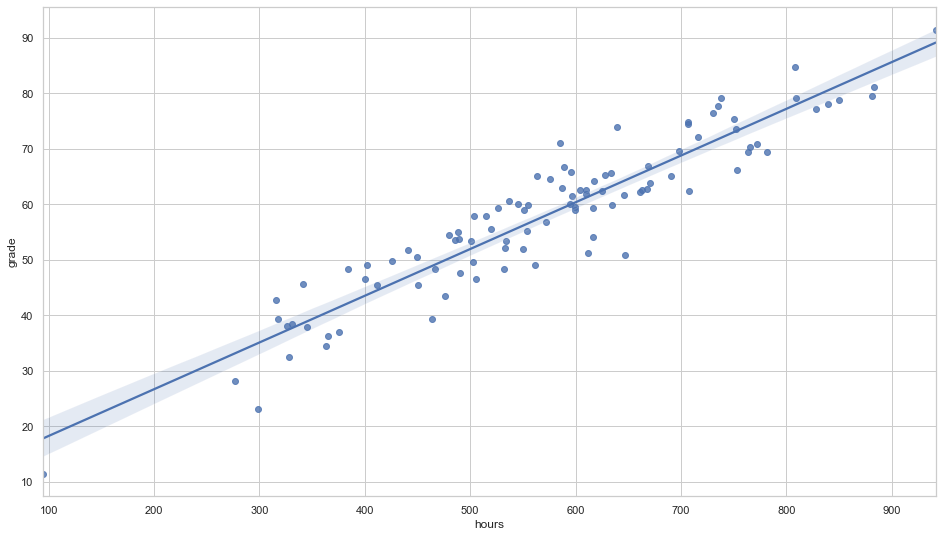

In [230]:
sns.regplot(x='hours', y='grade', data=data);

Of course, in the real life we don´t know the true parameters of the model, neither if the model is real!!! Today we´ll learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):



<center> <b>"All models are wrong, but some are useful"</b> </center>


In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

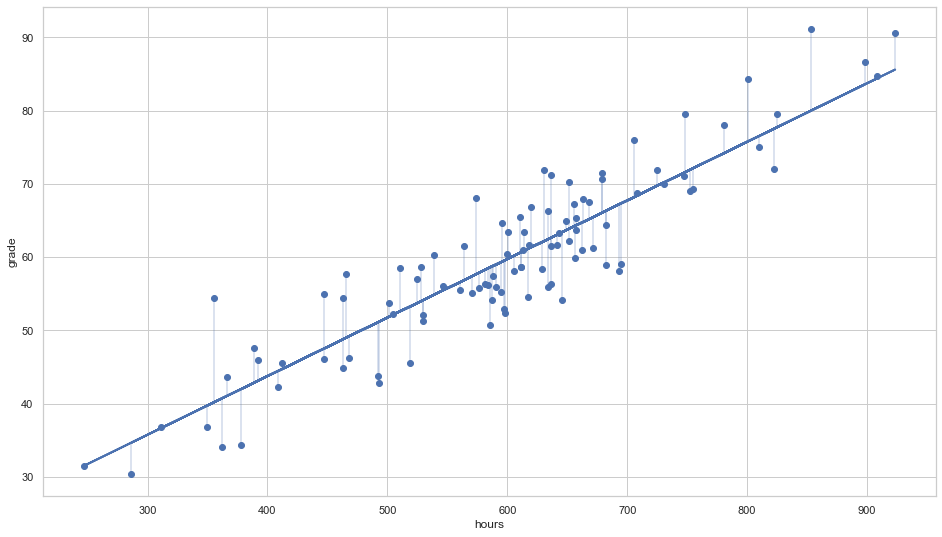

In [188]:
# regression line
y_hat = 11.75 + 0.08 * X
# plot the linear fit on top of the scatter
plt.scatter(X, y)
plt.plot(X, y_hat, lw=2)
plt.vlines(X, y_hat, y, lw=0.4)
plt.xlabel('hours')
plt.ylabel('grade')
plt.show()


The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$



### How good are our estimates?

The theory stablishes that the coefficients we find via the least squares method are **unbiased**, that is, the don´t systematically over or underestimate the true values.

There are also formulas to estimate the **Standard Error** of the estimates $SE(\hat{\beta_0})$ and $SE(\hat{\beta_1})$, from which we can obtain the $95\%$ confidence intervals as:


$$\hat\beta \pm 2*SE(\hat{\beta})$$



In [189]:
lr = LinearRegression()

In [236]:
#generate data
beta_1_hat_dist = []
beta_0_hat_dist = []

for _ in range(1000):
    beta_1 =  0.08
    beta_0 = 12
    num_points = 100
    X = np.random.normal(600, 150, num_points) # study hours

    # And the grades are...
    y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
    data = pd.DataFrame({'grade': y,
                         'hours': X})
    # Compute confidence intervals with the resampling technique (will check results later)
    lr.fit(X=data.hours.to_frame(),
           y=data.grade)

    beta_1_hat_dist.append(lr.coef_[0])
    beta_0_hat_dist.append(lr.intercept_)

In [237]:
# confidence intervals
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)
i_max = pd.Series(params).quantile(0.975)
print(f'The 95% confidence interval is: {np.round(i_min,3), np.round(i_max, 3)}')

The 95% confidence interval is: (0.073, 0.086)


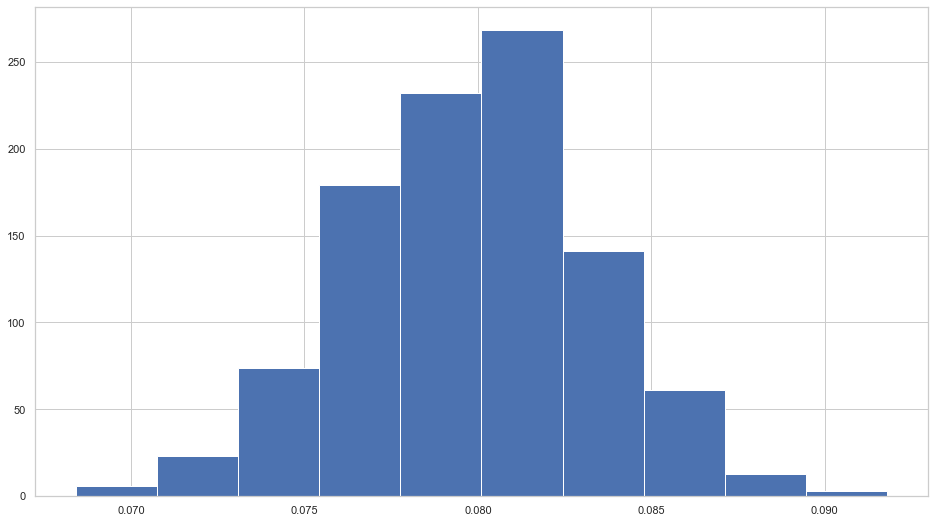

In [238]:
plt.hist(params)
plt.show()

### Can we safely conclude that there is a true relationship between X and y?


If the standard error is large and the estimated value small we can not be sure that its true value is really different from zero --- i.e. not statistically significant. Luckily for us we know about Hypothesis testing!!


* Null hypothesis $H_0: \beta_1 = 0 $
* Alternative hypothesis $H_a: \beta_1 \ne 0$

To test this we compute a *t-statistic* which measures the how many standard errors our parameter is away from 0:

$$t=\frac{\hat{\beta_1}}{SE(\hat{\beta_1})}$$


Statisticians have worked out what the distribution of this statistic is under the null hypothesys --- a t-distrubution, not very imaginative. Knowing this distribution we ca determine the probability our results are due to chance. You alredy know that, we can calcualte the **p-value**.

**CAUTION!** here is another [video](https://www.youtube.com/watch?v=0Rnq1NpHdmw) to remind you the dangers of the p-values: 

In [292]:
# From the example in the previous class
beta_1 =  0.08 #0.08
beta_0 = 12
num_points = 100
X = np.random.normal(600, 150, num_points) # study hours

# And the grades are...
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, scale=5, size=num_points)
data = pd.DataFrame({'grade': y,
                     'hours': X})

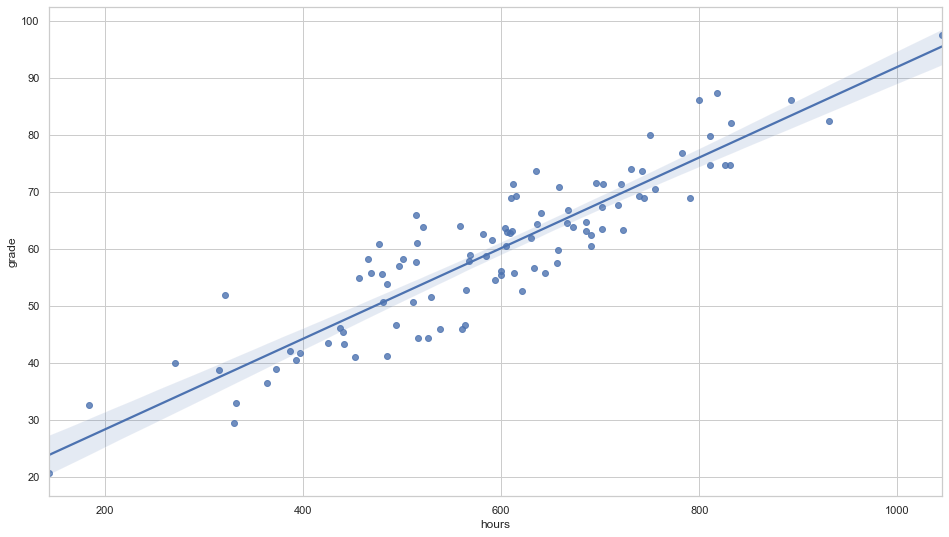

In [293]:
sns.regplot(x='hours', y='grade', data=data);

In [294]:
# Based on the distributions found 
params = beta_1_hat_dist
i_min = pd.Series(params).quantile(0.025)

### How good is our model?
No matter how significant our parameters are... if the model is terrible! 


If just use the mean as the predicted value for each predicion, the error we would make is (*total sum of squares*):

$$TTS=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

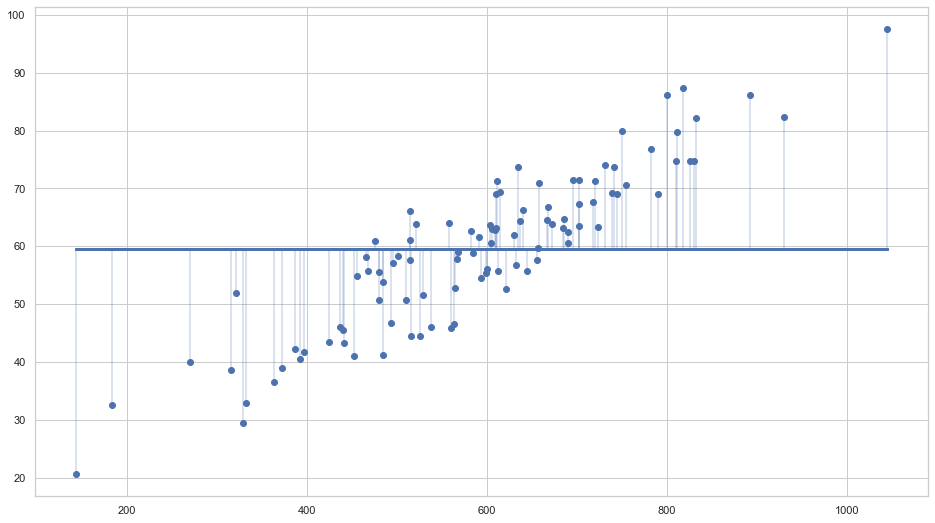

In [295]:
# show mean prediction
mean_prediction = [data.grade.mean()] * num_points
plt.scatter(X, y)
plt.plot(X, mean_prediction, lw=3)
plt.vlines(X, mean_prediction, y, lw=0.4)
plt.show()

In [296]:
# Calculate TSS for the above model
TSS = ((data.grade - mean_prediction) ** 2).sum()
TSS

18830.64439584104

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the squeared of the *Pearson´s* correlation coefficient we already know. 

In [297]:
# Calculate the R^2 of the above model

lr.fit(X=data.hours.to_frame(), y=data.grade)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
    
y_hat = beta_0 + beta_1 * data.hours

RSS = ((data.grade - y_hat) ** 2).sum()

In [298]:
beta_1

0.07950992412420291

In [299]:
# R^2
(TSS - RSS) / (TSS)

0.8224399670895101

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

In [300]:
results = smf.ols('grade ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     453.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.46e-38
Time:                        13:10:53   Log-Likelihood:                -317.38
No. Observations:                 100   AIC:                             638.8
Df Residuals:                      98   BIC:                             644.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4427      2.283      5.449      0.000       7.911      16.974
hours          0.0795      0.004     21.306      0.000       0.072       0.087
==============================================================================
Omnibus:                        3.486   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.561
Skew:                           0.238   Prob(JB):                        0.278
Kurtosis:                       2.378   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [338]:
# From the example in the previous class
beta_2 = -0.02 # party hours
beta_1 = 0.08 #0.08 # hours studying
beta_0 = 11.75
num_points = 100
X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

#
y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [339]:
data = pd.DataFrame({'grades':y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

In [340]:
data

,grades,study_hours,party_hours
0,81.016369,873.481730,159.631318
1,72.135977,846.189263,152.654078
2,5.650333,134.915626,424.796785
3,47.871680,545.683830,539.333121
4,28.017129,387.037942,527.160176
...,...,...,...
95,35.956115,394.846371,345.028089
96,54.898619,650.149006,523.292430
97,52.410798,600.563257,236.635052
98,52.332597,528.883286,-57.555444


The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


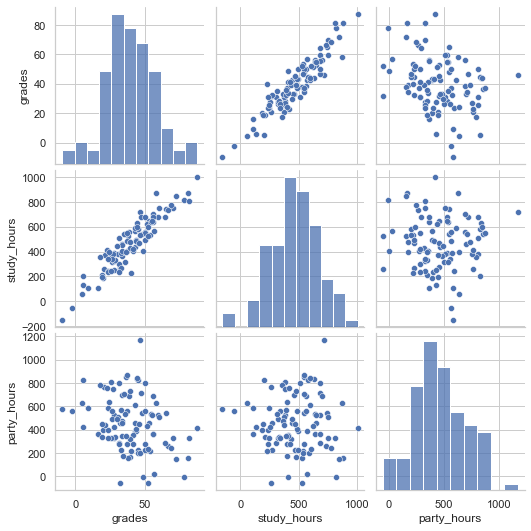

In [341]:
sns.pairplot(data);

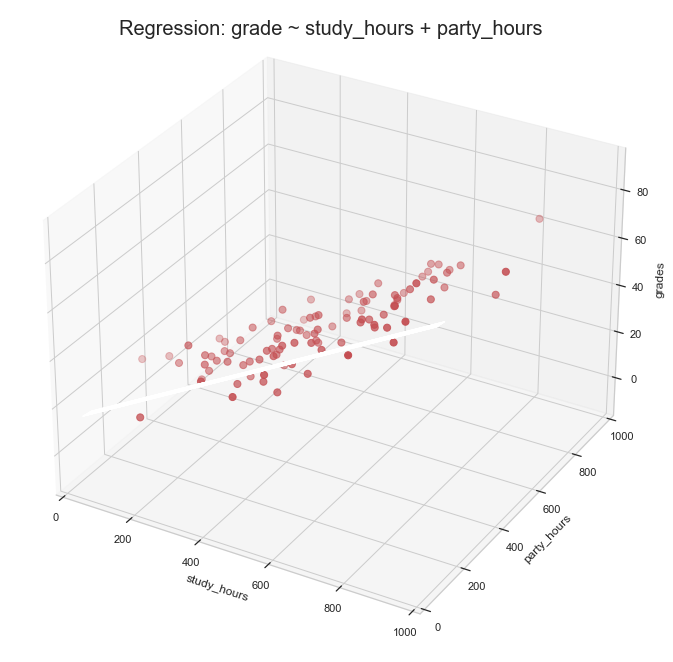

In [342]:
# Create plot
hours = np.arange(0,1000)
iq = np.arange(80,120)

B1, B2 = np.meshgrid(hours, iq, indexing='xy')
Z = np.zeros((iq.size, hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.01, )
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0,1000)
ax.set_ylabel('party_hours')
ax.set_ylim(ymin=0, ymax=1000)
ax.set_zlabel('grades');

In [343]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grades   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     647.4
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           7.86e-57
Time:                        13:32:56   Log-Likelihood:                -296.82
No. Observations:                 100   AIC:                             599.6
Df Residuals:                      97   BIC:                             607.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2704      1.533      8.004      0.000       9.228      15.313
study_hours     0.0790      0.002     34.184      0.000       0.074       0.084
party_hours    -0.0213      0.002    -10.218      0.000      -0.025      -0.017
==============================================================================
Omnibus:                        1.737   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.420   Jarque-Bera (JB):                1.210
Skew:                          -0.112   Prob(JB):                        0.546
Kurtosis:                       3.490   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The null hypothesis expands here to say that all coefficients are equal to 0. The alternative is only that at least one of them is significant. An F test is performed to test for significance.
$$ F = \frac{(SST - SSE)/p}{SSE / (n - p - 1)}$$

In [344]:
data

,grades,study_hours,party_hours
0,81.016369,873.481730,159.631318
1,72.135977,846.189263,152.654078
2,5.650333,134.915626,424.796785
3,47.871680,545.683830,539.333121
4,28.017129,387.037942,527.160176
...,...,...,...
95,35.956115,394.846371,345.028089
96,54.898619,650.149006,523.292430
97,52.410798,600.563257,236.635052
98,52.332597,528.883286,-57.555444


# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)